In [4]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox

import joblib

In [5]:
model = joblib.load("C:\\Users\\amrji\\Ai Ml\\Projects\\Calories_burnt.pkl")

C:\Users\amrji\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\amrji\AppData\Local\Temp\ipykernel_20928\2969732838.py:37: UserWarning: Glyph 129397 (\N{OVERHEATED FACE}) missing from current font.
  fig_canvas.draw()
c:\Program Files\Python312\Lib\tkinter\__init__.py:861: UserWarning: Glyph 129397 (\N{OVERHEATED FACE}) missing from current font.
  func(*args)


KeyboardInterrupt: 

C:\Users\amrji\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129397 (\N{OVERHEATED FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


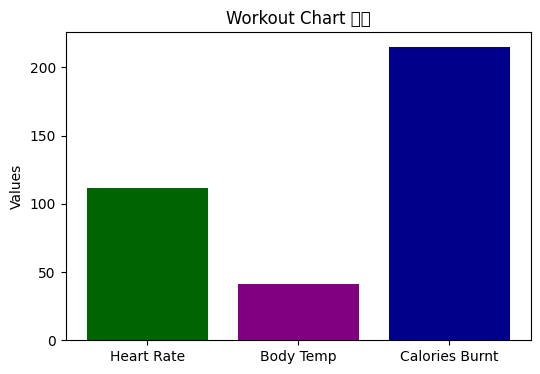

In [11]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def predict_calories(gender, age, height, weight, duration):

    result = model.predict([[gender, age, height, weight, duration]])
    heart_rate = result[0][0]
    body_temp = result[0][1]
    calories_burnt = result[0][2]
    
    return heart_rate, body_temp, calories_burnt

def calorie_calculator():
    gender = int(gender_entry.get())
    age = int(age_entry.get())
    height = int(height_entry.get())
    weight = int(weight_entry.get())
    duration = int(duration_entry.get())
    
    if gender in [0, 1] and age in range(18, 100) and height in range(100, 200) and weight in range(25, 100) and duration in range(1, 150):
        heart_rate, body_temp, calories_burnt = predict_calories(gender, age, height, weight, duration)
        
        heartRate_label.config(text='Heart Rate: {:.2f}'.format(heart_rate))
        bodyTemp_label.config(text='Body Temp: {:.2f}'.format(body_temp))
        CalorieBurnt_label.config(text='Calories Burnt: {:.2f}'.format(calories_burnt))

        # bar graph
        x = ['Heart Rate', 'Body Temp', 'Calories Burnt']
        y = [heart_rate, body_temp, calories_burnt]
        colors = ['darkgreen', 'purple', 'darkblue']
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.bar(x, y, color=colors)
        ax.set_title('Workout Chart')
        ax.set_ylabel('Values')

        fig_canvas = FigureCanvasTkAgg(fig, master=result_window)
        fig_canvas.draw()
        fig_canvas.get_tk_widget().pack()
        
        result_window.deiconify()
        root.withdraw()
    else:
        messagebox.askretrycancel("Error", "Invalid input! Please enter valid values.")

# Frontend
root = tk.Tk()
root.title('Calorie Calculator')

main_frame = ttk.Frame(root)
main_frame.grid(row=0, column=0, padx=10, pady=10)

gender_label = ttk.Label(main_frame, text="Gender[0-male, 1-female]: ")
gender_entry = ttk.Entry(main_frame)

age_label1 = ttk.Label(main_frame, text="Age: ")
age_entry = ttk.Entry(main_frame)

height_label2 = ttk.Label(main_frame, text="Height(cm): ")
height_entry = ttk.Entry(main_frame)

weight_label3 = ttk.Label(main_frame, text="Weight(kg): ")
weight_entry = ttk.Entry(main_frame)

duration_label4 = ttk.Label(main_frame, text="Duration(min): ")
duration_entry = ttk.Entry(main_frame)

calorie_btn = ttk.Button(main_frame, text='Calculate', command=calorie_calculator)

gender_label.grid(row=0, column=0, padx=5, pady=5)
gender_entry.grid(row=0, column=1, padx=5, pady=5)

age_label1.grid(row=1, column=0, padx=5, pady=5)
age_entry.grid(row=1, column=1, padx=5, pady=5)

height_label2.grid(row=2, column=0, padx=5, pady=5)
height_entry.grid(row=2, column=1, padx=5, pady=5)

weight_label3.grid(row=3, column=0, padx=5, pady=5)
weight_entry.grid(row=3, column=1, padx=5, pady=5)

duration_label4.grid(row=4, column=0, padx=5, pady=5)
duration_entry.grid(row=4, column=1, padx=5, pady=5)

calorie_btn.grid(row=5, columnspan=2, padx=5, pady=10)

result_window = tk.Toplevel(root)
result_window.title('Calorie Calculation Result')
result_window.withdraw()

result_frame = ttk.Frame(result_window)
result_frame.pack(padx=10, pady=10)

heartRate_label = ttk.Label(result_frame)
bodyTemp_label = ttk.Label(result_frame)
CalorieBurnt_label = ttk.Label(result_frame)

heartRate_label.grid(row=0, columnspan=2, padx=5, pady=5)
bodyTemp_label.grid(row=1, columnspan=2, padx=5, pady=5)
CalorieBurnt_label.grid(row=2, columnspan=2, padx=5, pady=5)

root.mainloop()
